<a href="https://colab.research.google.com/github/AliceFelipe/trabalho_analise_de_dados/blob/main/Desafio1_Tutorado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANDO ARQUIVOS - BIBLIOTECA

In [ ]:
import pandas as pd
estados = pd.read_csv('estados_brasileiros.csv' , sep = ';' , encoding='latin-1')

CARREGAR OS ARQUIVOS DE BASE

COLETANDO OS DADOS DOS ARQUIVOS BASE

In [ ]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [ ]:
from pandas.util.version import CmpKey
clientes = pd.read_excel('dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [ ]:
idade = pd.read_csv('idade_clientes.csv' , sep= ';' , encoding='latin-1')
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


PREPARAÇÃO / TRATAMENTO DOS DADOS

ANALISAR AS VARIÁVEIS DAS BASES DE DADOS

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [ ]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [ ]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [ ]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


VERIFICAR SE EXISTEM DADOS AUSENTES E/OU NULOS

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

VERIFICAR OS REGISTROS COM VALORES NULOU OU AUSENTES

In [ ]:
estados.loc[estados['pais'].isnull()]

,id_estado,estado,sigla_estado,pais
17,18,Piauí,pi,NaN
23,24,Santa Catarina,sc,NaN


In [ ]:
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


EXCLUINDO DADOS AUSENTES 

In [ ]:
clientes.dropna(subset=['peso'],inplace=True)

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

In [ ]:
estados.dropna(subset=['pais'],inplace=True)

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

In [ ]:
estados.count()

id_estado       25
estado          25
sigla_estado    25
pais            25
dtype: int64

ANALISANDO SUBSTITUIÇÃO DOS DADOS - GRÁFICOS

In [ ]:
import matplotlib.pyplot as plt

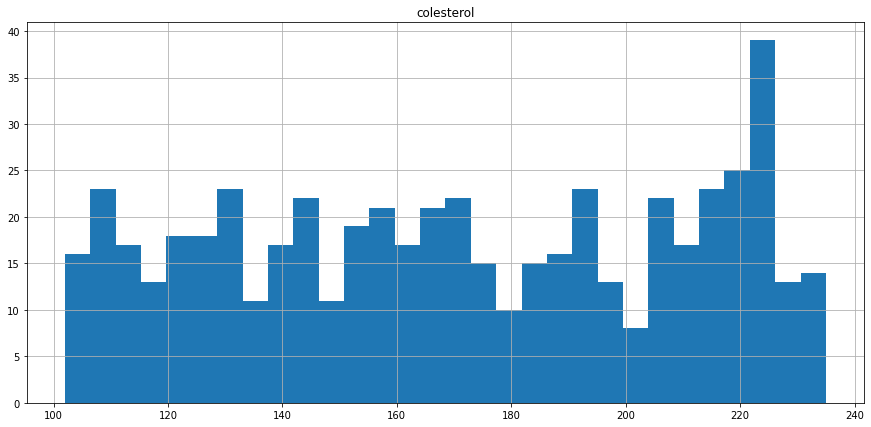

In [ ]:
clientes.hist(column='colesterol' , figsize=(15,7), bins=30)
plt.show()

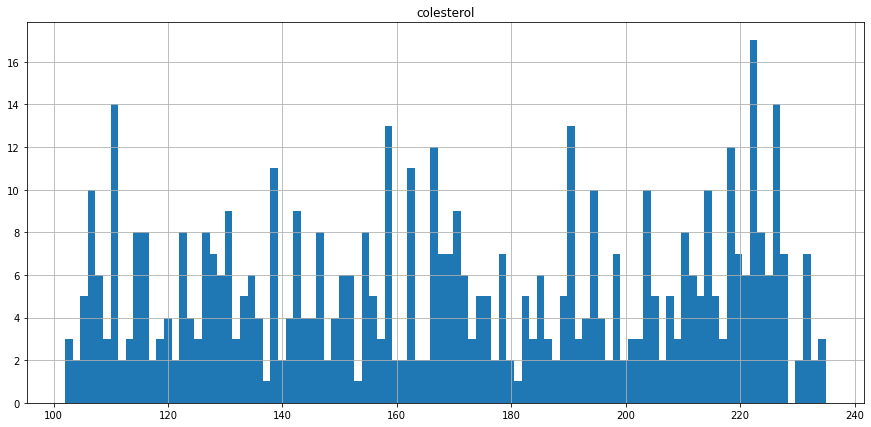

In [ ]:
clientes.hist(column='colesterol' , figsize=(15,7), bins=100)
plt.show()

CRIANDO UM IDENTIFICADOR PARA VARIÁVEL DE GÊNERO

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [ ]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b24963b10>]],
      dtype=object)

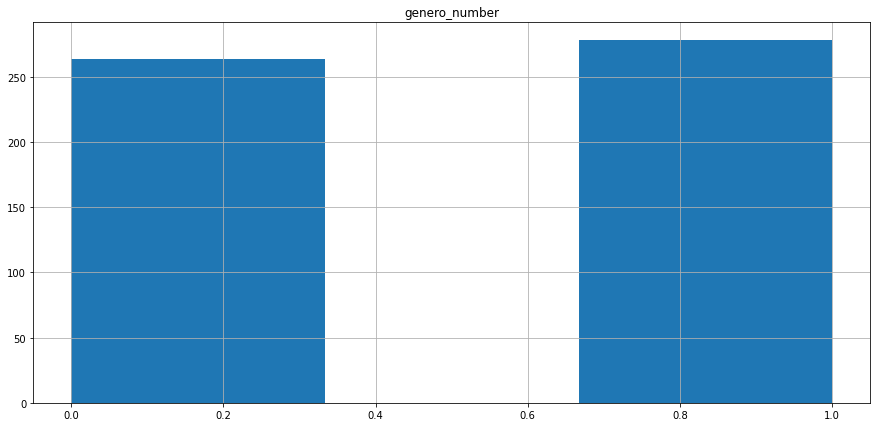

In [ ]:
clientes.hist(column='genero_number' , figsize= (15,7), bins=3)

JUNÇÃO DOS DADOS COLETADOS CLIENTES E ESTADO

In [ ]:
estados[:7]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceará,ce,Brasil
6,7,Distrito Federal,df,Brasil


In [ ]:
clientes[:7]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
5,6,198.0,227,Masculino,8,1
6,7,114.0,131,Masculino,26,1


In [ ]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


JUNÇÃO DE DADOS JA JUNTADOS ESTADO E CLIENTES, AGORA INSERIR IDADES

In [ ]:
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [ ]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
494,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
495,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
496,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


ORGANIZANDO O BANCO DE DADOS - TROCA DE ROTULO DE COLUNAS

In [ ]:
base_completa.rename(columns={'id_cliente' : 'cod_cliente' , 'genero_number' : 'cod_genero'}, inplace = True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
base_completa.sigla_estado.str.upper()

0      RR
17     DF
39     AM
64     SE
83     ES
       ..
418    RO
430    AC
155    CE
372    RN
100    ES
Name: sigla_estado, Length: 498, dtype: object

In [ ]:
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,ES,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57


In [ ]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
17,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
39,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
64,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
83,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
430,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
155,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
372,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [ ]:
base_completa = base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']].reset_index(drop=True)

In [ ]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


CALCULANDO O WCSS

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#DEFININDO UMA FÓRMULA DE CÁLCULO DE WCSS
def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters= k)
    kmeans=KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X=dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [ ]:
dados_cliente = base_completa[['peso' , 'colesterol']]
dados_cliente.head()

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227


In [ ]:
wcss_clientes = calcular_wcss(dados_cliente)

In [ ]:
type(wcss_clientes)

list

In [ ]:
for i in range(len(wcss_clientes)) :
  print(f'o cluster {i} possui valor de wcss de: {wcss_clientes[i]}')

o cluster 0 possui valor de wcss de: 1248240.6686746986
o cluster 1 possui valor de wcss de: 298932.7377352369
o cluster 2 possui valor de wcss de: 127842.60787249672
o cluster 3 possui valor de wcss de: 73809.93553059456
o cluster 4 possui valor de wcss de: 49068.8738718445
o cluster 5 possui valor de wcss de: 34064.50002100837
o cluster 6 possui valor de wcss de: 25079.92393550797
o cluster 7 possui valor de wcss de: 20378.05126656164
o cluster 8 possui valor de wcss de: 16003.657266380145
o cluster 9 possui valor de wcss de: 13385.38391038145


VISUALIZANDO O GRÁFICO COTOVELO

In [ ]:
import plotly.express as px #criação de gráficos dinamicos 
import plotly.offline as py
import plotly.graph_objects as go #para criação e concatenização de gráficos

In [ ]:
grafico_wcss = px.line( x= range(1,11),
                        y=wcss_clientes
                      )
fig = go.Figure(grafico_wcss)

fig.update_layout(title= 'calculando o WCSS',
                  xaxis_title='Numero de clusters',
                  yaxis_title= 'Valor do Wcss',
                  template = 'plotly_white'
                  )

fig.show()

In [ ]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0
...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1


In [ ]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

In [ ]:
grafico = px.scatter(x = base_completa['peso'],
                      y = base_completa['colesterol'],
                      color= base_completa['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

In [ ]:
grafico = px.scatter(x = base_completa['colesterol'],
                     y = base_completa['peso'],
                     color= base_completa['cluster'])

fig = go.Figure(grafico)

fig.update_layout(title= 'Analise de clusters',
                  xaxis_title='colesterol',
                  yaxis_title= 'peso',
                  )

fig.show()

In [ ]:
def plotar_grafico(x,y, xlabel, y_label):
  grafico = px.scatter(x = X,
                     y = y,
                     color= base_completa['cluster'])

fig = go.Figure(grafico)

fig.update_layout(title= 'Analise de clusters',
                  xaxis_title='xlabel',
                  yaxis_title= 'y_label',
                  )

fig.show()

In [ ]:
cluster_clientes =  base_completa

In [ ]:
cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==3,'nome_cluster'] = 'Risco Moderado alto'
cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster'] = 'Risco Moderado baixo'
cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster'] = 'Baixo risco'

In [ ]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2,Baixo risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2,Baixo risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2,Baixo risco
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1,Risco Moderado baixo
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0,Alto Risco
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1,Risco Moderado baixo
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2,Baixo risco
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1,Risco Moderado baixo


In [ ]:
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,43.204225,15.208965,16.0,32.00,42.5,56.00,69.0
Baixo risco,129.0,43.139535,15.428132,17.0,30.00,41.0,58.00,70.0
Risco Moderado alto,106.0,42.716981,15.355318,16.0,29.25,44.0,54.75,70.0
Risco Moderado baixo,121.0,42.347107,14.411633,17.0,30.00,41.0,54.00,70.0


In [ ]:
cluster_clientes.groupby(['nome_cluster','genero'])['peso'].describe()

count        mean        std    min     25%  \
nome_cluster         genero                                                   
Alto Risco           Feminino    60.0  185.983333   8.032754  168.0  180.00   
                     Masculino   82.0  183.109756  10.743940  167.0  173.25   
Baixo risco          Feminino    58.0  108.396552   6.472451   96.0  104.00   
                     Masculino   71.0  105.690141   5.953610   95.0  101.50   
Risco Moderado alto  Feminino    59.0  152.135593   7.300112  140.0  145.00   
                     Masculino   47.0  152.553191   6.730232  140.0  148.00   
Risco Moderado baixo Feminino    63.0  129.317460   7.079788  116.0  125.00   
                     Masculino   58.0  125.672414   6.383608  115.0  120.25   

                                  50%     75%    max  
nome_cluster         genero                           
Alto Risco           Feminino   186.0  192.00  203.0  
                     Masculino  182.0  189.75  203.0  
Baixo risco          Feminino   110.0  113.00  118.0  
                     Masculino  105.0  110.00  118.0  
Risco Moderado alto  Feminino   154.0  157.00  169.0  
                     Masculino  151.0  154.50  168.0  
Risco Moderado baixo Feminino   129.0  135.00  142.0  
                     Masculino  125.5  131.00  140.0

In [ ]:
cluster_clientes.groupby('nome_cluster')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,184.323944,9.764278,167.0,176.25,184.0,191.0,203.0
Baixo risco,129.0,106.906977,6.313975,95.0,102.00,107.0,112.0,118.0
Risco Moderado alto,106.0,152.320755,7.023155,140.0,147.25,152.0,157.0,169.0
Risco Moderado baixo,121.0,127.570248,6.971163,115.0,122.00,128.0,133.0,142.0


In [ ]:
cluster_clientes.groupby('nome_cluster')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,218.985915,8.086400,204.0,213.00,220.0,225.0,235.0
Baixo risco,129.0,119.573643,10.292424,102.0,110.00,120.0,129.0,138.0
Risco Moderado alto,106.0,186.037736,9.760879,168.0,177.25,187.5,194.0,203.0
Risco Moderado baixo,121.0,154.206612,9.776602,138.0,146.00,155.0,163.0,171.0


In [ ]:
cluster_clientes.groupby(['nome_cluster','genero'])['colesterol'].describe()

count        mean        std    min     25%  \
nome_cluster         genero                                                   
Alto Risco           Feminino    60.0  220.650000   6.456701  204.0  216.75   
                     Masculino   82.0  217.768293   8.939162  204.0  211.00   
Baixo risco          Feminino    58.0  122.448276  10.372319  102.0  113.00   
                     Masculino   71.0  117.225352   9.677953  102.0  109.00   
Risco Moderado alto  Feminino    59.0  186.152542  10.182496  168.0  176.00   
                     Masculino   47.0  185.893617   9.311596  172.0  178.00   
Risco Moderado baixo Feminino    63.0  156.571429   9.596226  138.0  149.00   
                     Masculino   58.0  151.637931   9.389614  138.0  143.25   

                                  50%    75%    max  
nome_cluster         genero                          
Alto Risco           Feminino   221.0  225.0  235.0  
                     Masculino  219.0  225.0  235.0  
Baixo risco          Feminino   124.5  130.0  138.0  
                     Masculino  115.0  126.0  136.0  
Risco Moderado alto  Feminino   189.0  194.5  201.0  
                     Masculino  184.0  192.5  203.0  
Risco Moderado baixo Feminino   156.0  166.0  171.0  
                     Masculino  151.5  158.0  168.0